In [1]:
# Import librarys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

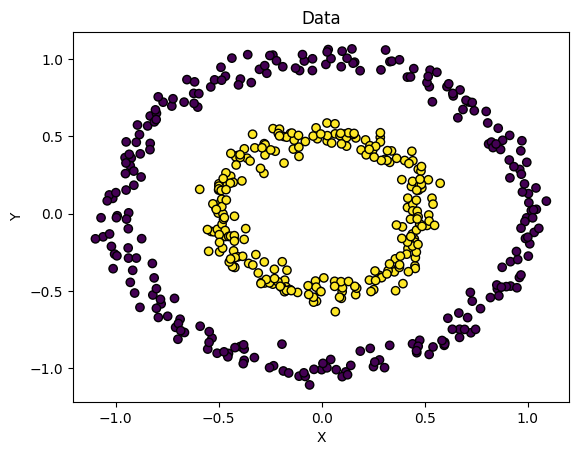

In [2]:
# Generate data in ring shape
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Train SVM models with different kernels
linear_svm = SVC(kernel='linear')
poly_svm = SVC(kernel='poly', degree=2)
rbf_svm = SVC(kernel='rbf')

linear_svm.fit(X, y)
poly_svm.fit(X, y)
rbf_svm.fit(X, y)

# Create a meshgrid to cover the feature space
h = 0.02  # step size in the meshgrid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
linear_z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
poly_z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
rbf_z = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
linear_z = linear_z.reshape(xx.shape)
poly_z = poly_z.reshape(xx.shape)
rbf_z = rbf_z.reshape(xx.shape)

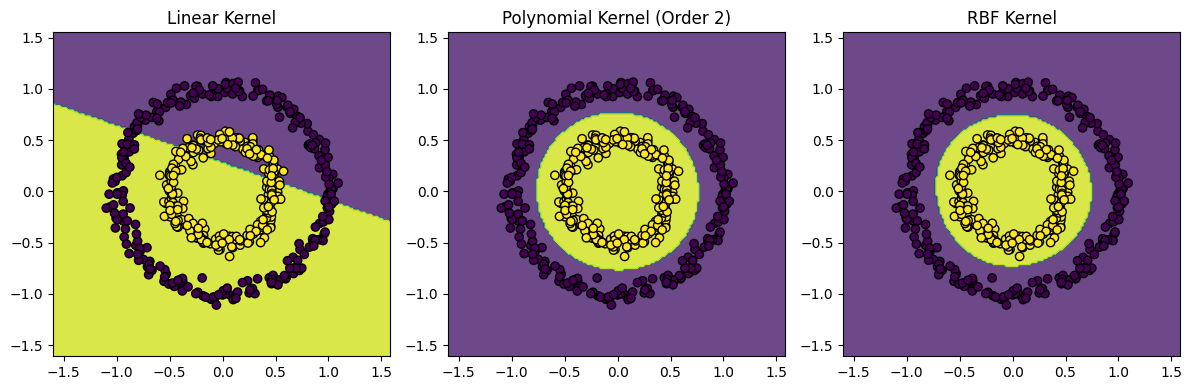

In [4]:
# Plot the decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.contourf(xx, yy, linear_z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Linear Kernel')

plt.subplot(132)
plt.contourf(xx, yy, poly_z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Polynomial Kernel (Order 2)')

plt.subplot(133)
plt.contourf(xx, yy, rbf_z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()